In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings   

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
data['Sale_Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [3]:
data['mean'] = data['Sale_Price'].mean()
data['mean'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean, dtype: float64

ValueError: x and y must be the same size

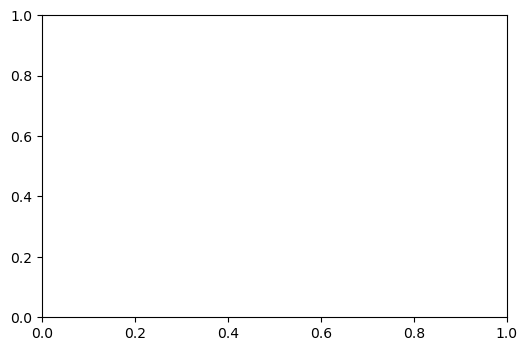

In [17]:
plt.figure(dpi = 100) #resolution of the image
k = range(0, len(data)) #acts as index and will be the x axis
plt.scatter(k, data['Sale_Price'].sort_values, color = 'red', label= 'actual sales price')
plt.plot(k, data['mean'].sort_values, color = 'green', label= 'mean sales price')
plt.xlabel('ur mom')
plt.ylabel('sales price')
plt.title('overall price')
plt.legend()

In [11]:
#better way to improve mean regression model
#we using the pivot table func to calculate the mean of sales price w.r.t. overall grade
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean
#here we got the sales price for values of overall grades 1-10

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [14]:
#we make a new column called grades_mean
data['grades_mean']=0

#filling mean values for every grade in the column
for i in grades_mean.columns:
    data['grades_mean'][data['Overall Grade'] == i] = grades_mean[i][0]

data['grades_mean'].head()

/var/folders/kp/45v3c3g91ds_t7twxv3r3xgr0000gp/T/ipykernel_48127/887219353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grades_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
/var/folders/kp/45v3c3g91ds_t7twxv3r3xgr0000gp/T/ipykernel_48127/887219353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grades_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grades_mean, dtype: float64

In [15]:
gradewise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    gradewise_list.append(k)


In [16]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

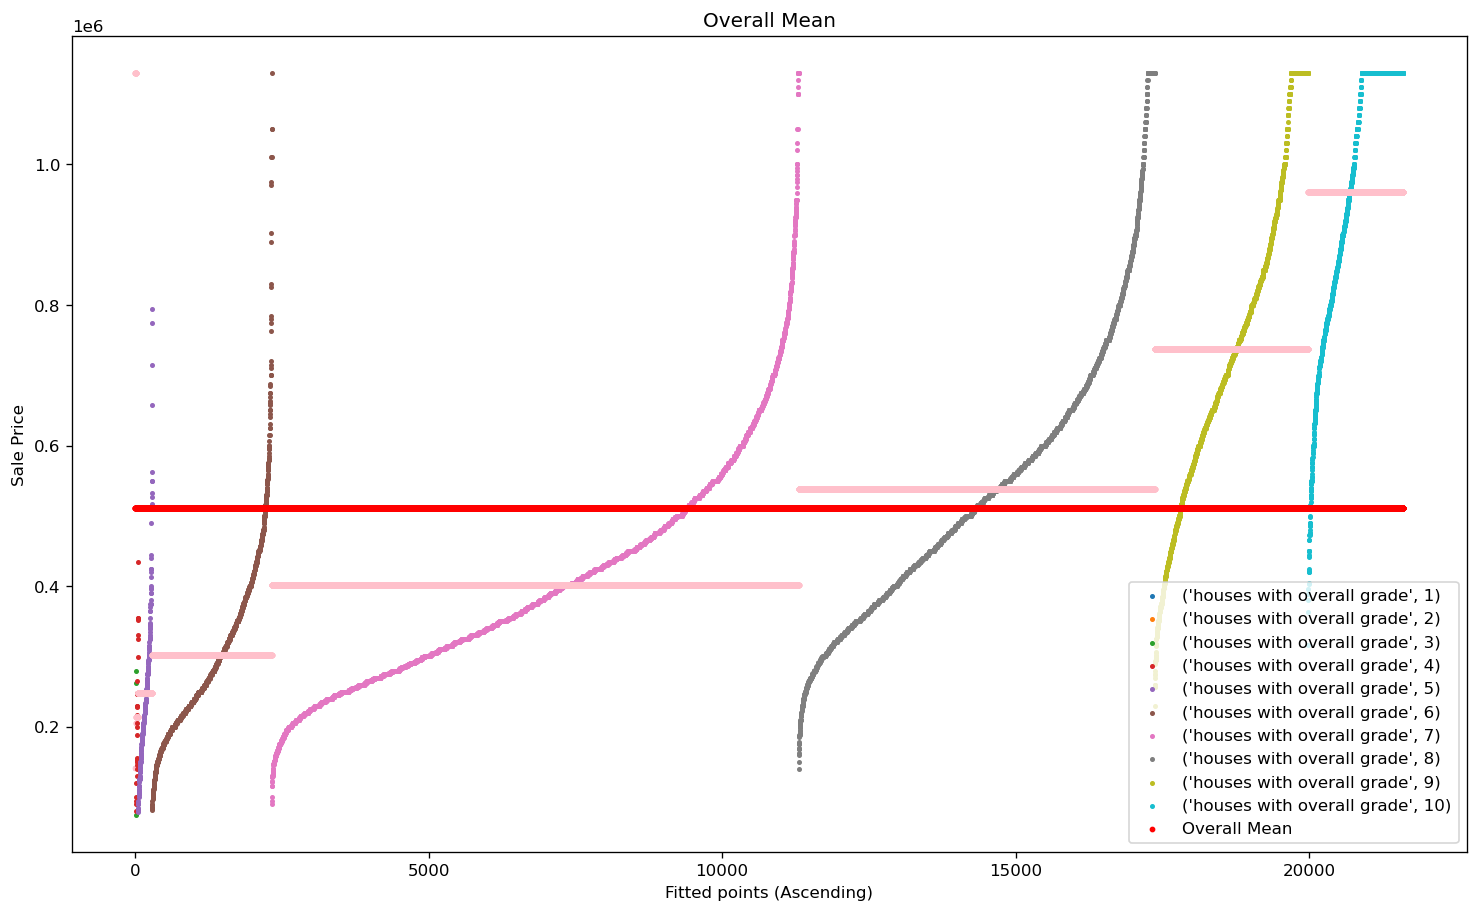

In [19]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

In [20]:
mean_diff = data['mean'] - data['Sale_Price']
grademean_diff = data['grades_mean'] - data['Sale_Price']

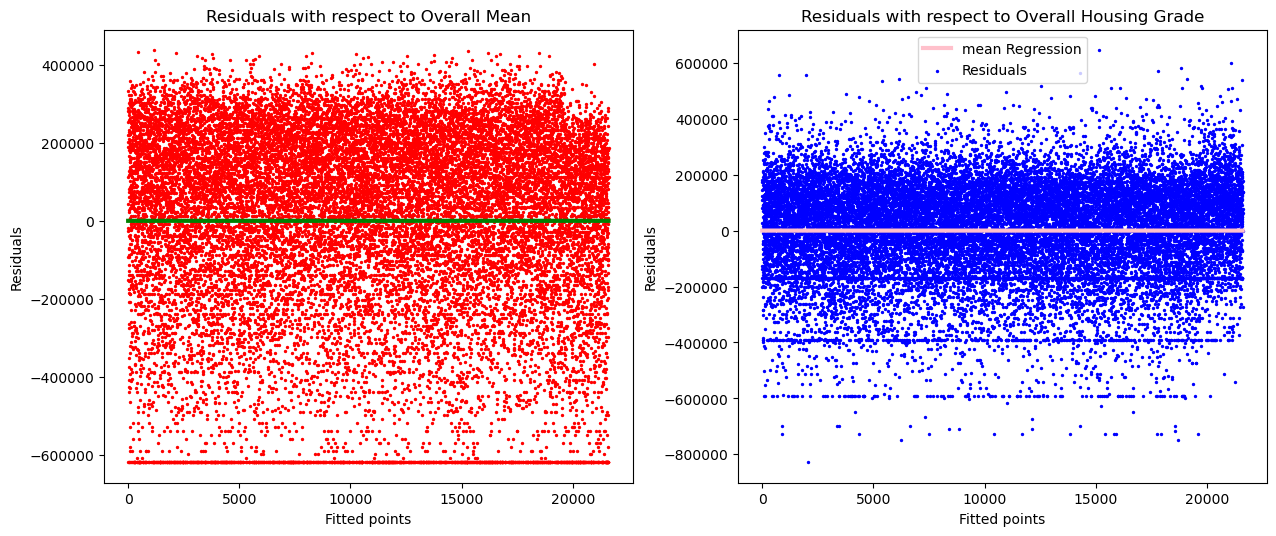

In [21]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter( k, mean_diff, color = 'red', label = 'residuals', s = 2 )
plt.plot( k, l, color = 'green', label = 'mean regression', linewidth= 3 )
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grademean_diff, color = 'blue', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'pink', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()
